In [1]:
import copy
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import OrderedDict
from scipy.signal import savgol_filter
from utils.plot_utils import set_fontsize
from utils.binning_utils import bin_dataset_switching
from utils.hdf_utils import load_measurement_data_devices_attrs
from utils.plot_utils import plot_binned_dataset_switching
from utils.binning_utils import bin_data, find_nearest_idx, combine_arrays_irregular, \
                                average_binned_data, bin_dataset_switching

In [2]:
fname = "2020_11_18.hdf"
dset_name = "1605818836 RC P2 F1 with R0 F1 det"

devices = ()

In [3]:
pmt_channel = 1
shutter_channel = 2

pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

In [4]:
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pmt_data -= pmt_data[:,150:250].mean(axis = 1)[:, np.newaxis]
shutter_data = np.array([pxie[idx][:,shutter_channel].mean() for idx in range(1,len(pxie)+1)])

In [74]:
def get_shutter_slice(val):
    state = val > 2e4
    if state:
        return np.s_[::2], np.s_[1::2]
    else:
        return np.s_[1::2], np.s_[::2]

In [119]:
nbunched = 50
bunched = pmt_data[:int(len(pmt_data)//nbunched * nbunched),:].reshape(-1,nbunched,2000)

In [121]:
integrals_open = []
integrals_closed = []

for idx, bunch in enumerate(bunched):
    slice_open, slice_closed = get_shutter_slice(shutter_data[idx*nbunched])
    so = bunch[slice_open
    io = np.trapz(so, axis = 1)
    ic = np.trapz(sc, axis = 1)]
    sc = bunch[slice_closed]
    integrals_open.extend(io)
    integrals_closed.extend(ic)
    
integrals_open = np.array(integrals_open)
integrals_closed = np.array(integrals_closed)
print(f'{np.mean(integrals_open)/np.mean(integrals_closed):.3f} +/- {np.std(ratios):.3f}')

2.833 +/- 1.019


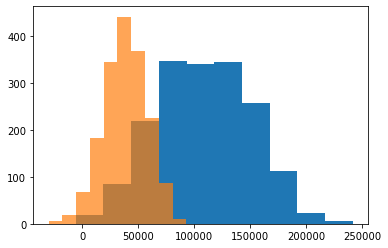

In [122]:
plt.hist(integrals_open)
plt.hist(integrals_closed, alpha = 0.7);

In [123]:
ratios = []
for idx, bunch in enumerate(bunched):
    slice_open, slice_closed = get_shutter_slice(shutter_data[idx*nbunched])
    mo = bunch[slice_open].mean(axis = 0)
    mc = bunch[slice_closed].mean(axis = 0)
    io = np.trapz(mo)
    ic = np.trapz(mc)
    ratios.append(io/ic)

2.864 +/- 0.396


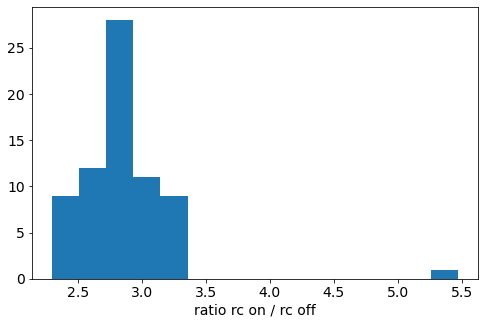

In [124]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(ratios, bins = 15)

ax.set_xlabel('ratio rc on / rc off')

set_fontsize(ax, 14)
print(f'{np.mean(ratios):.3f} +/- {np.std(ratios):.3f}')

In [125]:
ratios = []
for idx, bunch in enumerate(bunched):
    slice_open, slice_closed = get_shutter_slice(shutter_data[idx*nbunched])
    so = bunch[slice_open]
    sc = bunch[slice_closed]
    io = np.trapz(so, axis = 1)
    ic = np.trapz(sc, axis = 1)
    ratios.extend(io/ic)
ratios = np.array(ratios)

(array([ 10.,  69., 324., 483., 335., 190.,  96.,  66.,  32.,  21.,  12.,
          7.,   9.,   5.]),
 array([ 0.        ,  0.71428571,  1.42857143,  2.14285714,  2.85714286,
         3.57142857,  4.28571429,  5.        ,  5.71428571,  6.42857143,
         7.14285714,  7.85714286,  8.57142857,  9.28571429, 10.        ]),
 <BarContainer object of 14 artists>)

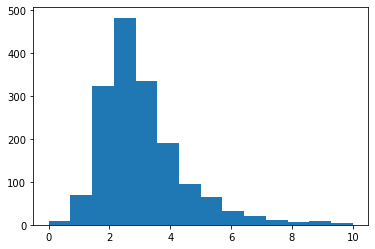

In [126]:
plt.hist(ratios, bins = np.linspace(0,10,15))

In [127]:
ratios_filtered = ratios[(ratios > 0) & (ratios < (np.mean(ratios)+2*np.std(ratios)))]

(array([ 10.,  69., 324., 483., 335., 190.,  96.,  66.,  32.,  21.,  12.,
          7.,   9.,   5.]),
 array([ 0.        ,  0.71428571,  1.42857143,  2.14285714,  2.85714286,
         3.57142857,  4.28571429,  5.        ,  5.71428571,  6.42857143,
         7.14285714,  7.85714286,  8.57142857,  9.28571429, 10.        ]),
 <BarContainer object of 14 artists>)

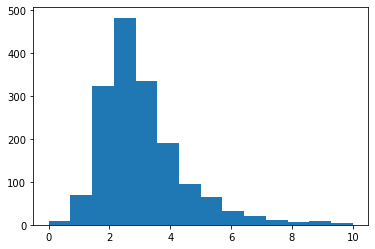

In [128]:
plt.hist(ratios_filtered, bins = np.linspace(0,10,15))

In [129]:
ratios_filtered.mean()

3.253634716238691